In [1]:
import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

1 Physical GPUs, 1 Logical GPUs


In [2]:
tf.__version__

'2.1.2'

In [3]:
graphgallery.__version__

'0.5.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets/", verbose=False)
graph = data.graph
idx_train, idx_val, idx_test = data.split_nodes()


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

In [6]:
from graphgallery.nn.gallery import GMNN
model = GMNN(graph, device='GPU', attr_transform="normalize_attr", seed=123)
model.build()
# train with validation
histories = model.train(idx_train, idx_val, verbose=1, epochs=100)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


Training...
100/100 [==============================] - 2s 17ms/step - loss: 0.4996 - acc: 0.9500 - val_loss: 0.9498 - val_acc: 0.7960 - time: 1.6659
Training...
100/100 [==============================] - 1s 13ms/step - loss: 0.1392 - acc: 0.9645 - val_loss: 1.4482 - val_acc: 0.8160 - time: 1.3075
Training...
100/100 [==============================] - 1s 11ms/step - loss: 0.6728 - acc: 0.8792 - val_loss: 0.9066 - val_acc: 0.8000 - time: 1.1124
Testing...
1/1 [==============================] - 0s 74ms/step - test_loss: 0.7578 - test_acc: 0.8320 - time: 0.0743
Test loss 0.75784, Test accuracy 83.20%


## Show model summary

In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_q (InputLayer)            [(None, 1433)]       0                                            
__________________________________________________________________________________________________
adj_matrix (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
graph_convolution_2 (GraphConvo (None, 16)           22928       input_q[0][0]                    
                                                                 adj_matrix[0][0]                 
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 16)           0           graph_convolution_2[0][0]  

## Visualization Training 

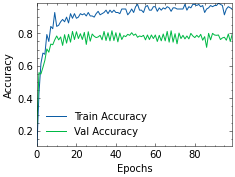

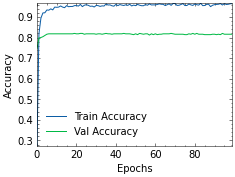

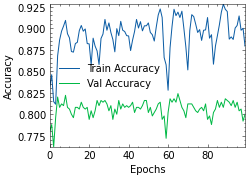

In [8]:
# NOTE: you must install SciencePlots package for a better preview.
for his in histories:
    with plt.style.context(['science', 'no-latex']):
        plt.plot(his.history['acc'])
        plt.plot(his.history['val_acc'])
        plt.legend(['Train Accuracy', 'Val Accuracy'])
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.autoscale(tight=True)
        plt.show()    

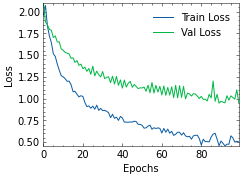

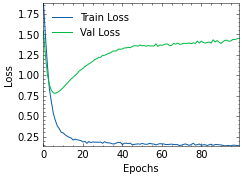

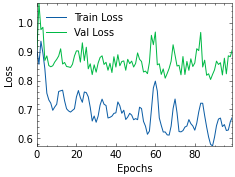

In [9]:
# NOTE: you must install SciencePlots package for a better preview.
for his in histories:
    with plt.style.context(['science', 'no-latex']):
        plt.plot(his.history['loss'])
        plt.plot(his.history['val_loss'])
        plt.legend(['Train Loss', 'Val Loss'])
        plt.ylabel('Loss')
        plt.xlabel('Epochs')
        plt.autoscale(tight=True)
        plt.show()    